In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from scipy.stats import contingency as cont
import re
import json

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/assignment-2-statistical-analysis/__results__.html
/kaggle/input/assignment-2-statistical-analysis/website_data.parquet
/kaggle/input/assignment-2-statistical-analysis/__notebook__.ipynb
/kaggle/input/assignment-2-statistical-analysis/__output__.json
/kaggle/input/assignment-2-statistical-analysis/custom.css


In [69]:
df = pd.read_parquet("/kaggle/input/assignment-2-statistical-analysis/website_data.parquet")
df

date   device  fast_fp  avg_fp  slow_fp  p75_fp  fast_fcp  \
0       2024-01-01  tablet   0.0063   0.0071  0.0021   2200.0  0.0095     
1       2024-01-01  desktop  0.3132   0.1539  0.0920   2000.0  0.4066     
2       2024-01-01  desktop  0.7398   0.1557  0.0180   800.0   0.8613     
3       2024-01-01  desktop  0.0883   0.0561  0.0165   1900.0  0.1194     
4       2024-01-01  desktop  0.0973   0.3047  0.0446   2000.0  0.3127     
...            ...      ...     ...      ...     ...      ...     ...     
2266616 2024-01-01  desktop  0.1316   0.0231  0.0014   700.0   0.1506     
2266617 2024-01-01  tablet   0.0094   0.0112  0.0023   1800.0  0.0162     
2266618 2024-01-01  desktop  0.4522   0.0456  0.0131   400.0   0.4859     
2266619 2024-01-01  tablet   0.0333   0.0075  0.0002   900.0   0.0401     
2266620 2024-01-01  tablet   0.0038   0.0058  0.0005   1400.0  0.0092     

         avg_fcp  slow_fcp  p75_fcp  ...  p75_inp_origin  protocol  \
0        0.0030   0.0038    2700.0   ...  150.0           https:     
1        0.0612   0.0931    2000.0   ...  75.0            https:     
2        0.0351   0.0176    800.0    ...  50.0            https:     
3        0.0276   0.0164    1900.0   ...  100.0           https:     
4        0.1017   0.0473    2000.0   ...  100.0           https:     
...         ...      ...       ...   ...    ...              ...     
2266616  0.0049   0.0015    700.0    ...  75.0            https:     
2266617  0.0039   0.0022    1800.0   ...  100.0           https:     
2266618  0.0149   0.0135    400.0    ...  75.0            https:     
2266619  0.0013   0.0002    900.0    ...  150.0           https:     
2266620  0.0006   0.0005    1400.0   ...  75.0            https:     

                                 domain  siteIsOnline  numIpAddressesDetected  \
0        www.carltonlgrayfuneral.com     True          2.0                      
1        sede.aytoalmeria.es             True          1.0                      
2        secure.rentecdirect.com         True          2.0                      
3        seventeen-web.jp                True          4.0                      
4        servicematica.com               True          1.0                      
...                    ...                ...          ...                      
2266616  shop.obusedo.com                True          4.0                      
2266617  ahaphimz.com                    True          2.0                      
2266618  aplikasi.jknsarawak.moh.gov.my  True          1.0                      
2266619  qceleb.com                      True          1.0                      
2266620  pt.freedownloadmanager.org      True          1.0                      

                      detectedCloudPlatforms  whatrunsDateUnixMillis  \
0        ["Amazon Web Services (us-east-1)"] NaT                       
1        []                                  2021-07-04 18:17:50.033   
2        ["Cloudflare"]                      2019-08-22 02:21:32.301   
3        ["Amazon Web Services (GLOBAL)"]    2023-09-28 01:57:04.916   
4        []                                  2019-05-29 07:47:05.473   
...      ..                                                      ...   
2266616  ["Amazon Web Services (GLOBAL)"]    2019-09-19 12:51:32.307   
2266617  ["Cloudflare"]                      NaT                       
2266618  []                                  2021-07-30 11:58:08.730   
2266619  []                                  NaT                       
2266620  []                                  2019-08-17 17:01:39.967   

                                                                                                                                                                                                                                                                                                                                                                                                                                                  

# Part 1

<Figure size 1000x600 with 0 Axes>

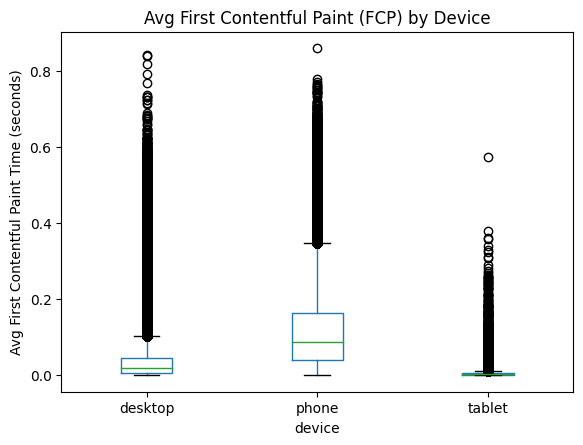

In [66]:
df['avg_fcp'] = pd.to_numeric(df['avg_fcp'], errors='coerce')
df = df.dropna(subset=['avg_fcp'])

plt.figure(figsize=(10, 6))
df.boxplot(column='avg_fcp', by='device', grid=False)
plt.title('Avg First Contentful Paint (FCP) by Device')
plt.suptitle('')  
plt.ylabel('Avg First Contentful Paint Time (seconds)')
plt.show()

In [67]:
df.groupby('device')['avg_fcp'].describe()

/tmp/ipykernel_33/1894301742.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('device')['avg_fcp'].describe()


,count,mean,std,min,25%,50%,75%,max
device,,,,,,,,
desktop,863765.0,0.037779,0.053274,0.0,0.0071,0.0185,0.0455,0.8403
phone,962873.0,0.113857,0.096832,0.0,0.0401,0.0867,0.1630,0.8590
tablet,432343.0,0.004976,0.007022,0.0,0.0018,0.0032,0.0058,0.5740


In [ ]:
from scipy.stats import kruskal

h_stat, p_value = kruskal(
    df[df['device'] == 'desktop']['avg_fcp'],
    df[df['device'] == 'tablet']['avg_fcp'],
    df[df['device'] == 'phone']['avg_fcp']
)

print(f"H-statistic: {h_stat}, P-value: {p_value}")

H-statistic: 1105466.7124264364, P-value: 0.0


**Conclusion #1**

H0: There is no difference in average fcp times across devices

HA: There is a stastically significant difference in average fcp times across devices

The Kruskal-Wallis test gives a p-value of 0, which indicates we can reject the null hypothesis.

In [70]:
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

comparisons = [('desktop', 'phone'), ('desktop', 'tablet'), ('phone', 'tablet')]

p_values = []
for group1, group2 in comparisons:
    stat, p = mannwhitneyu(
        df[df['device'] == group1]['avg_fcp'],
        df[df['device'] == group2]['avg_fcp'],
        alternative='two-sided'
    )
    p_values.append(p)
    print(f"Mann-Whitney test between {group1} and {group2} gives p-value of {p}")

Mann-Whitney test between desktop and phone gives p-value of 0.0
Mann-Whitney test between desktop and tablet gives p-value of 0.0
Mann-Whitney test between phone and tablet gives p-value of 0.0


# Part 2

In [71]:
pd.crosstab(df['device'], df['domain'])

domain,0-1.ir,0-105.com,0-infoweb-newsbank-com.www.saclibrarycatalog.org,0.blueperfectballon.com,0.discoverapp.com,0.fiveminutes.biz,0.freebasics.com,0.lan05.biz,0.leftblastermode.com,0.lords.lat,...,zzz.myworkplace.aviva.co.uk,zzzcode.ai,zzzquilnatura.it,zzzscore.com,zzztop.x.yupoo.com,zzzttt01.com,zzztube.com,zzztube.tv,zzzz.com,zzzzap.nl
device,,,,,,,,,,,,,,,,,,,,,
desktop,1,1,1,0,0,1,0,0,0,1,...,1,1,1,1,1,1,1,1,0,1
phone,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
tablet,0,1,0,1,0,1,0,0,1,1,...,1,0,1,0,0,0,1,1,0,0


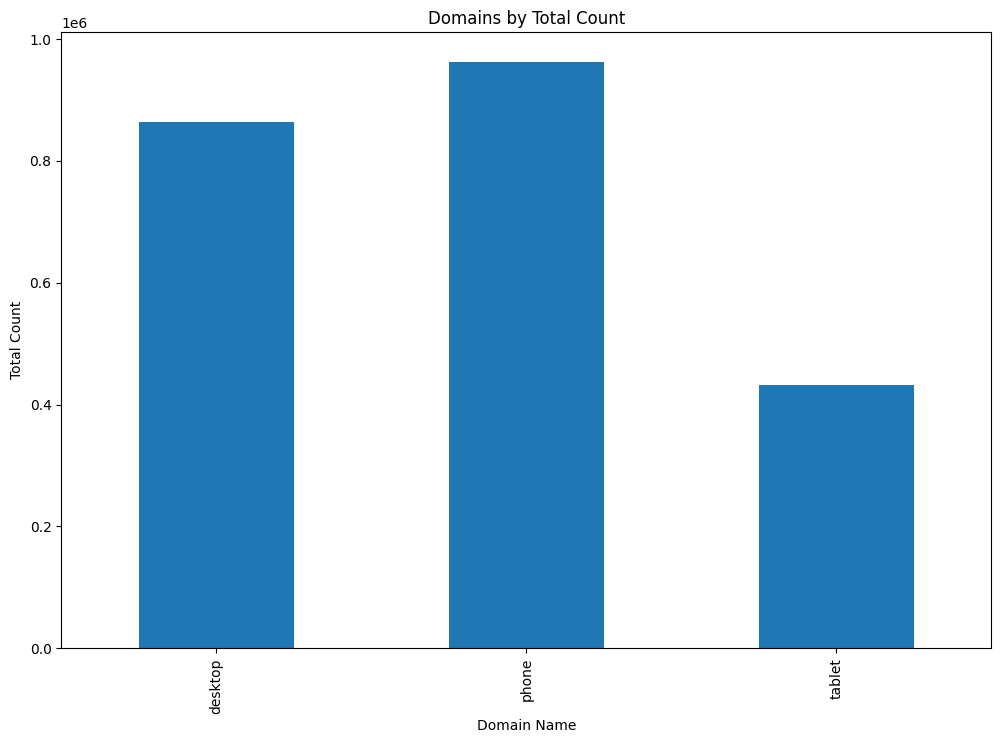

In [72]:
data = pd.crosstab(df['device'], df['domain'])
data['Total'] = data.sum(axis=1)

plt.figure(figsize=(12, 8))
data['Total'].plot(kind='bar')
plt.xlabel('Domain Name')
plt.ylabel('Total Count')
plt.title('Domains by Total Count')
plt.show()

In [73]:
observed = pd.crosstab(df['device'], df['domain'])
_, p_value, _, _ = cont.chi2_contingency(observed.to_numpy())
print(p_value)

1.0


**Conclusion #2**

Null Hypothesis: There is no association between the type of device and the domain used.

Alternative Hypothesis: There is an association between the type of device and the domain used.

The p value is greater than the level of significance of 0.05 so we support the null hypothesis. Thus, there is no correlation between the device used and the domain used (the device used doesn't affect the popularity of a given website).

# Part 3. Does using a cloud provider affect website performance?

In this section, we aim to determine the correlation between the list of cloud providers and the first contentful paint (FCP) of a website. FCP refers to the amount of time elapsed between the user navigating to a website and the website beginning to show useful data on the screen.

We can use a t-test to compare the FCP for websites that don't use a cloud provider to websites that do. The hypotheses are below:
- $H_0$: for a particular cloud provider, the average FCP of sites using that cloud provider is equal to the average FCP of sites not using that cloud provider.
- $H_0$: for a particular cloud provider, the average FCP of sites using that cloud provider is not equal to the average FCP of sites not using that cloud provider.

In [74]:
pd.DataFrame(df["detectedCloudPlatforms"].unique())

,0
0,"[""Amazon Web Services (us-east-1)""]"
1,[]
2,"[""Cloudflare""]"
3,"[""Amazon Web Services (GLOBAL)""]"
4,"[""Amazon Web Services (us-west-1)""]"
...,...
163,"[""Amazon Web Services (us-west-1)"",""Amazon Web Services (eu-central-1)"",""Amazon Web Services (us-east-2)""]"
164,"[""Amazon Web Services (sa-east-1)"",""Amazon Web Services (us-west-1)""]"
165,"[""Amazon Web Services (us-east-2)"",""Amazon Web Services (us-west-2)"",""Amazon Web Services (us-east-1)""]"
166,"[""Amazon Web Services (eu-central-1)"",""Amazon Web Services (us-east-1)"",""Amazon Web Services (us-east-2)"",""Amazon Web Services (us-west-1)""]"


In [75]:
import sys

name_replacements = {"Amazon Web Services": "AWS", "Microsoft Azure": "Azure"}
def shorten_name(name):
    name = re.sub(r'(.+?)( \(.+\)|)$', r'\1', name)
    if name in name_replacements: return name_replacements[name]
    else: return name
    
def remove_region_info(string):
    if string is None: return None
    return frozenset({sys.intern(shorten_name(x)) for x in json.loads(string)})
df["detectedCloudPlatformsNoRegion"] = df["detectedCloudPlatforms"].apply(remove_region_info)

In [76]:
df["detectedCloudPlatformsNoRegion"].unique()

array([frozenset({'AWS'}), frozenset(), frozenset({'Cloudflare'}),
       frozenset({'Google Cloud'}), frozenset({'Azure'}), None,
       frozenset({'GitHub Pages'}), frozenset({'Cloudflare', 'AWS'}),
       frozenset({'Google Cloud', 'Azure'}),
       frozenset({'Google Cloud', 'AWS'}),
       frozenset({'Cloudflare', 'Google Cloud'})], dtype=object)

In [77]:
df.groupby("domain", observed=True)["date"].count()

domain
0-1.ir                                              2
0-105.com                                           3
0-infoweb-newsbank-com.www.saclibrarycatalog.org    1
0.blueperfectballon.com                             2
0.discoverapp.com                                   1
                                                   ..
zzzttt01.com                                        2
zzztube.com                                         3
zzztube.tv                                          3
zzzz.com                                            1
zzzzap.nl                                           2
Name: date, Length: 997183, dtype: int64

<Axes: ylabel='count'>

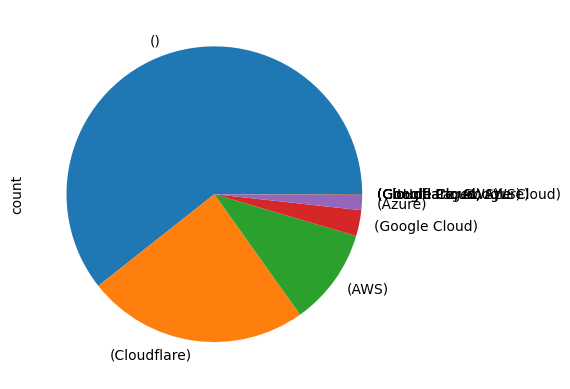

In [78]:
# df["detectedCloudPlatformsWithoutRegionInfo"] =
# list_cloud_platforms =
df["detectedCloudPlatformsNoRegion"].value_counts().plot.pie()

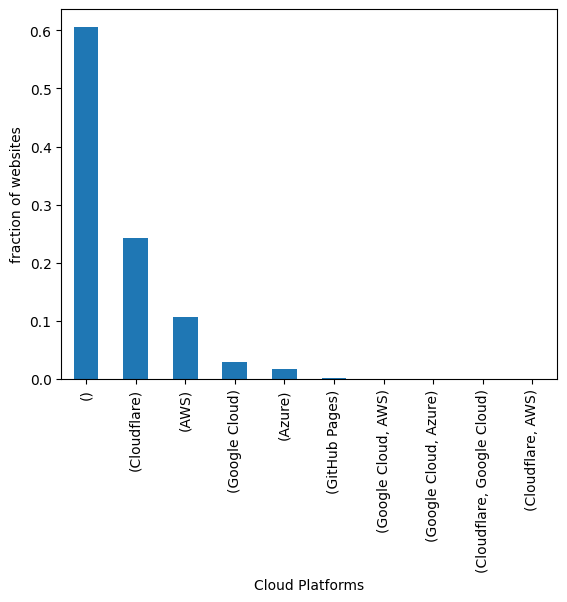

In [79]:
percentages = (df["detectedCloudPlatformsNoRegion"].value_counts()/df["detectedCloudPlatformsNoRegion"].count())

ax = percentages.plot.bar(xlabel = "Cloud Platforms", ylabel = "fraction of websites")

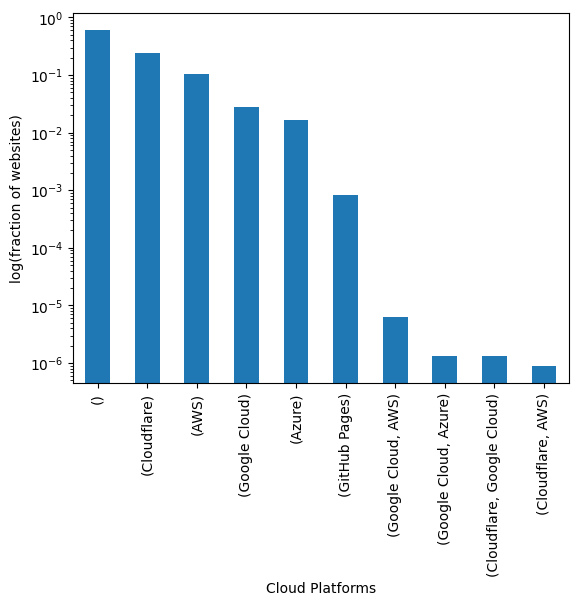

In [80]:
percentages = (df["detectedCloudPlatformsNoRegion"].value_counts()/df["detectedCloudPlatformsNoRegion"].count())

ax = percentages.plot.bar(xlabel = "Cloud Platforms", ylabel = "log(fraction of websites)", log=True)

In [81]:
from functools import reduce
all_cloud_platforms_series = pd.Series(list(reduce(lambda x,y:x if y is None else y if x is None else x|y, df["detectedCloudPlatformsNoRegion"].unique())))
all_cloud_platforms = pd.DataFrame()
all_cloud_platforms["Platform"] = all_cloud_platforms_series
del all_cloud_platforms_series

In [82]:
from scipy.stats import ttest_ind
from tqdm.auto import tqdm

mean_fcp_vals = []
stdev_fcp_vals = []
baseline_mean_fcp = []
degrees_of_freedom = []
t_statistic_vals = []
p_values = []
conclusion_str = []

for platform in tqdm(all_cloud_platforms["Platform"]):
    test_index = df["detectedCloudPlatformsNoRegion"].apply(lambda s: s if s is not None else frozenset()).apply(lambda s:platform in s)
    test_df = df[test_index]
    opp_df = df[~test_index]
    current_mean = test_df["avg_fcp"].mean()
    mean_fcp_vals.append(current_mean)
    stdev_fcp_vals.append(test_df["avg_fcp"].std())
    baseline_mean = opp_df["avg_fcp"].mean()
    baseline_mean_fcp.append(baseline_mean)
    
    result = ttest_ind(test_df["avg_fcp"].dropna(), opp_df["avg_fcp"].dropna())
    
    degrees_of_freedom.append(result.df)
    t_statistic_vals.append(result.statistic)
    p_values.append(result.pvalue)
    
    if result.pvalue < 0.05:
        conclusion_str.append(f"Reject H0. Websites using {platform} are statistically significantly {'slower' if current_mean > baseline_mean else 'faster'} to load than other websites.")
    else:
        conclusion_str.append(f"Fail to reject H0, {platform} produces no statistically significant difference.")

all_cloud_platforms["Mean FCP with this provider (s)"] = mean_fcp_vals
all_cloud_platforms["Standard Deviation FCP (s)"] = stdev_fcp_vals
all_cloud_platforms["Mean FCP without this provider (s)"] = baseline_mean_fcp
all_cloud_platforms["t-statistic"] = t_statistic_vals
all_cloud_platforms["p-values"] = p_values
all_cloud_platforms["Conclusion"] = conclusion_str

del mean_fcp_vals
del stdev_fcp_vals
del baseline_mean_fcp
del t_statistic_vals
del p_values
del conclusion_str

all_cloud_platforms

  0%|          | 0/5 [00:00<?, ?it/s]

,Platform,Mean FCP with this provider (s),Standard Deviation FCP (s),Mean FCP without this provider (s),t-statistic,p-values,Conclusion
0,Google Cloud,0.076173,0.096928,0.063575,37.151782,5.067061e-302,Reject H0. Websites using Google Cloud are statistically significantly slower to load than other websites.
1,Azure,0.062688,0.076001,0.063949,-2.855931,4.291118e-03,Reject H0. Websites using Azure are statistically significantly faster to load than other websites.
2,GitHub Pages,0.048853,0.073326,0.063941,-7.775645,7.509559e-15,Reject H0. Websites using GitHub Pages are statistically significantly faster to load than other websites.
3,Cloudflare,0.072740,0.093057,0.061140,88.687003,0.000000e+00,Reject H0. Websites using Cloudflare are statistically significantly slower to load than other websites.
4,AWS,0.069255,0.085034,0.063302,32.621479,2.306417e-233,Reject H0. Websites using AWS are statistically significantly slower to load than other websites.


In [83]:
max_colwidth_val = pd.get_option('display.max_colwidth')
pd.set_option('display.max_colwidth', 0)
all_cloud_platforms[["Platform", "Conclusion"]]

,Platform,Conclusion
0,Google Cloud,Reject H0. Websites using Google Cloud are statistically significantly slower to load than other websites.
1,Azure,Reject H0. Websites using Azure are statistically significantly faster to load than other websites.
2,GitHub Pages,Reject H0. Websites using GitHub Pages are statistically significantly faster to load than other websites.
3,Cloudflare,Reject H0. Websites using Cloudflare are statistically significantly slower to load than other websites.
4,AWS,Reject H0. Websites using AWS are statistically significantly slower to load than other websites.


In [84]:
pd.set_option('display.max_colwidth', max_colwidth_val)
del max_colwidth_val

## Results:
- The results were surprisingly varied between cloud providers, but all results were highly statistically significant, with p-values that amounted to rounding errors. While the magnitude of the difference was relatively small, we were able to find a meaningful statistically significant difference
- 5 t-tests were performed between the list of websites using a particular cloud provider and the list of websites not using that particular provider.

**We ultimately concluded:**
- Websites using GitHub Pages are statistically significantly faster to load than other websites. (p=7.509559e-15)
- Websites using Cloudflare are statistically significantly slower to load than other websites. (p-value too low to measure)
- Websites using Google Cloud are statistically significantly slower to load than other websites. (p=5.067061e-302)
- Websites using AWS are statistically significantly slower to load than other websites. (p=2.306417e-233)
- Websites using Azure are statistically significantly faster to load than other websites. (p=4.291118e-03)